In [ ]:
# Import libraries
import xarray as xr
import geopandas as gpd
import rioxarray



In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Air Data/ESA Sentinel-5P.nc'

In [ ]:
ds = xr.open_dataset(file_path)

In [ ]:
import geopandas as gpd
from shapely.geometry import Polygon

# Coordinates for the bounding box
lat_min, lat_max = 31.25, 31.75
lon_min, lon_max = 73.9625, 74.6875

# Define the corners of the bounding box
coords = [(lon_min, lat_min), (lon_max, lat_min), (lon_max, lat_max), (lon_min, lat_max)]

# Create a Polygon geometry
polygon = Polygon(coords)

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame({'geometry': [polygon]})

# Set the coordinate reference system (CRS) to WGS84 (EPSG:4326)
gdf.set_crs(epsg=4326, inplace=True)

,geometry
0,"POLYGON ((73.9625 31.25, 74.6875 31.25, 74.687..."


In [ ]:
ds = ds.rio.set_spatial_dims(x_dim="lon", y_dim="lat")

# Assign the correct CRS (e.g., EPSG:4326 for WGS84)
ds.rio.write_crs("EPSG:4326", inplace=True)

<xarray.Dataset> Size: 160MB
Dimensions:  (time: 72, lon: 388, lat: 358)
Coordinates:
  * lat      (lat) float64 3kB 60.96 61.02 61.07 61.13 ... 80.33 80.39 80.44
  * lon      (lon) float64 3kB 37.07 37.03 37.0 36.96 ... 23.73 23.7 23.66 23.63
  * time     (time) datetime64[ns] 576B 2019-01-31 2019-02-28 ... 2024-12-31
    crs      int64 8B 0
Data variables:
    CO       (time, lon, lat) float32 40MB ...
    NO2      (time, lon, lat) float32 40MB ...
    O3       (time, lon, lat) float32 40MB ...
    SO2      (time, lon, lat) float32 40MB ...
Attributes:
    Conventions:  CF-1.9
    institution:  openEO platform

In [ ]:
clipped = ds.rio.clip(gdf.geometry)

In [ ]:
clipped

<xarray.Dataset> Size: 210kB
Dimensions:      (lat: 13, lon: 14, time: 72)
Coordinates:
  * lat          (lat) float64 104B 74.0 74.06 74.11 74.17 ... 74.55 74.6 74.66
  * lon          (lon) float64 112B 31.72 31.68 31.65 31.62 ... 31.34 31.3 31.27
  * time         (time) datetime64[ns] 576B 2019-01-31 2019-02-28 ... 2024-12-31
    spatial_ref  int64 8B 0
    crs          int64 8B 0
Data variables:
    CO           (time, lon, lat) float32 52kB 0.03662 0.03756 ... 0.04178
    NO2          (time, lon, lat) float32 52kB 8.969e-05 0.0001045 ... 4.824e-05
    O3           (time, lon, lat) float32 52kB 0.1285 0.1283 ... 0.1283 0.1284
    SO2          (time, lon, lat) float32 52kB 0.0001889 ... -5.499e-05
Attributes:
    Conventions:  CF-1.9
    institution:  openEO platform

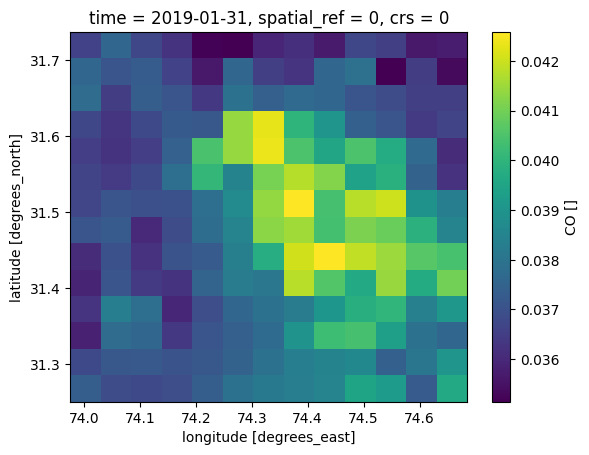

In [ ]:
clipped['CO'].isel(time=0).plot()

In [ ]:
import geopandas as gpd

In [ ]:
lhr = gpd.read_file('lahore.shp')

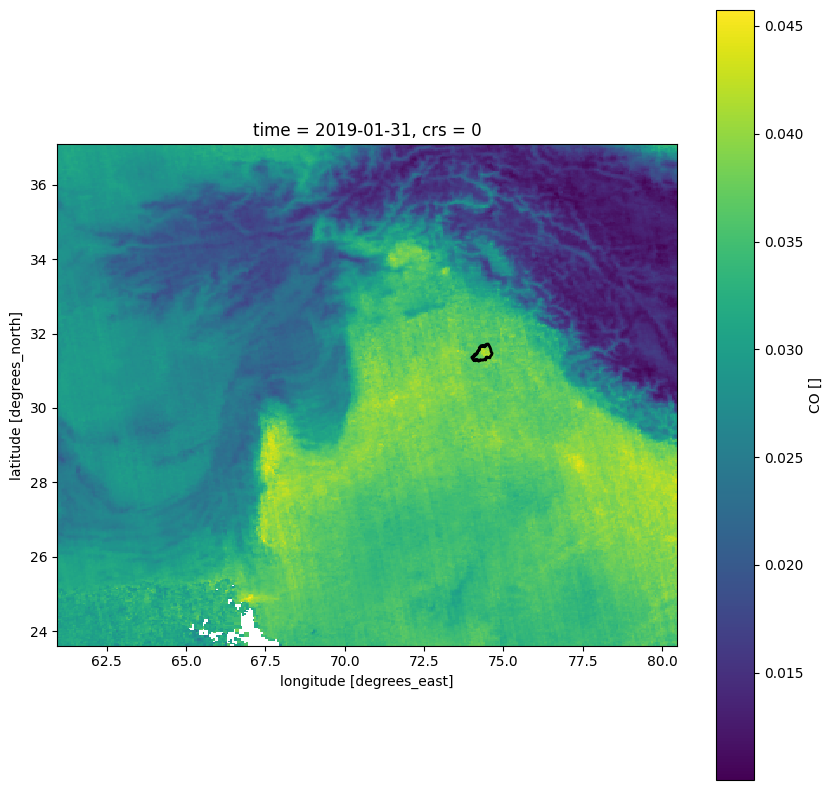

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Create the plot for the xarray data
fig, ax = plt.subplots(figsize=(10, 10))  # Create a new figure and axis

# Plot the xarray data
ds['CO'].isel(time=0).plot(ax=ax)

# Plot the boundary of the GeoDataFrame
lhr.boundary.plot(ax=ax, color='black', linewidth=2)

# Manually set the aspect ratio of the plot to be equal (if needed)
#ax.set_aspect('equal', adjustable='box')

# Show the plot
plt.show()


<Axes: >

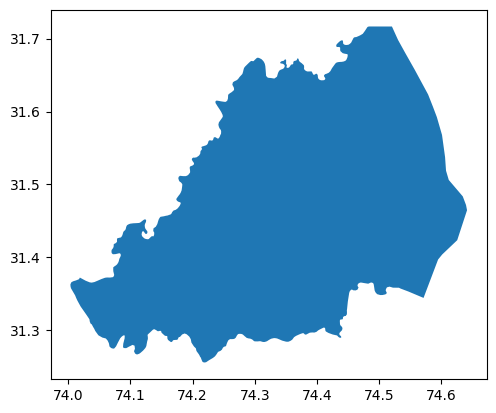

In [ ]:
lhr.plot()

In [ ]:
clipped.to_netcdf('Lahore_sentinel5p.nc')